In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
#load the input data of house prices from a csv
df = pd.read_csv('../input/housedata/data.csv')

In [3]:
#checking the data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Text(0.5, 1.0, 'Info')

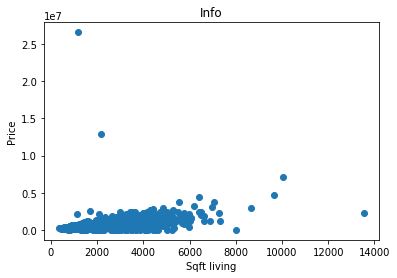

In [5]:
#visualize data
plt.scatter(df.sqft_living,df.price)
plt.xlabel('Sqft living')
plt.ylabel('Price')
plt.title('Info')

In [6]:
# define the input data (x) and define the output/prediction (y)
y = df.price
x = df.drop(['price','date'], axis=1)

In [7]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le_street = LabelEncoder()
le_city = LabelEncoder()
le_statezip = LabelEncoder()
le_country = LabelEncoder()

In [10]:
x['street_n'] = le_street.fit_transform(x['street'])
x['city_n'] = le_city.fit_transform(x['city'])
x['statezip_n'] = le_statezip.fit_transform(x['statezip'])
x['country_n'] = le_country.fit_transform(x['country'])
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,street_n,city_n,statezip_n,country_n
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1522,36,62,0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3899,35,58,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2291,18,26,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,4263,3,7,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,4352,31,31,0


In [11]:
x=x.drop(['street','city','country','statezip'], axis =1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street_n,city_n,statezip_n,country_n
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,0
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,0
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,0


In [12]:
# Train the data on linearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
# spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2, random_state = 100)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3680, 16)
(3680,)
(920, 16)
(920,)


In [15]:
# fitting data into model
model.fit(x_train,y_train )

LinearRegression()

In [16]:
# testing model with test data
model.score(x_test, y_test)

0.5129068848693588